# Content and Objectives

- Illustrate energies of energy detection
- Show histogram of received values

# Import

In [1]:
# importing
import numpy as np
from scipy import signal, special

import matplotlib.pyplot as plt
import matplotlib


In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=False)

matplotlib.rc('figure', figsize=(18, 8) )

# showing figures inline
%matplotlib inline

In [3]:
# set parameters for received values

# degrees of freedom equalling length of pulse
# assuming virtual sampling time of 1
M = 16
t_s = 1
T_pulse = M * t_s

# variance of the noise
sigma_Z_2 = 1

# number of realizations
N_real = int( 1e5 )

In [4]:
# define puls as gaussian

# time vector per pulse
n_per_pulse = np.arange( 0, M)

# parameters of the RRC filter
# design is chosen such that interval length equals 6 sigma
sigma_pulse_2 = ( T_pulse / 6. )**2
gaussian_pulse = np.exp( - ( n_per_pulse - T_pulse/2 )**2 / 2 / sigma_pulse_2 )

# normalize to energy 1 first
# scale amplitude by sqrt(2) such that power of pulse is twice as large since it is only transmitted when a binary "1" is sent
# then get energy per bit 
gaussian_pulse /= np.linalg.norm( gaussian_pulse )


# Fix non-centraility parameter of the non-central chi2 distribution and scale pulse accordingly
Lambda = 40
gaussian_pulse *= np.sqrt( Lambda )


# Perform Noise Realizations and Do Statistics...

In [5]:
# init arrays for energies
observed_energy_0 = np.zeros( N_real )
observed_energy_1 = np.zeros( N_real )

# loop for realizations:
for _n in range( N_real ):
    
    # generate noise and construct received signal
    noise = np.sqrt( sigma_Z_2 ) * np.random.randn( M )
    
    r_0 = noise
    r_1 = gaussian_pulse + noise

    # determine energy
    y_0 = np.sum( np.abs( r_0 )**2 )
    y_1 = np.sum( np.abs( r_1 )**2 )

    observed_energy_0[ _n ] = y_0
    observed_energy_1[ _n ] = y_1

print('average in 0:', np.mean( observed_energy_0 ))
print('average in 1:', np.mean( observed_energy_1 ))

average in 0: 16.006247749558938
average in 1: 56.067853253363545


In [6]:
# get histogram at pre-defined bins
bins = np.arange( 0, 2 * sigma_Z_2 * ( M + Lambda )  )
hist_energies_0, bin_edges_0 = np.histogram( observed_energy_0, bins=bins, density = True )
hist_energies_1, bin_edges_1 = np.histogram( observed_energy_1, bins=bins, density = True )

<Figure size 1800x800 with 0 Axes>

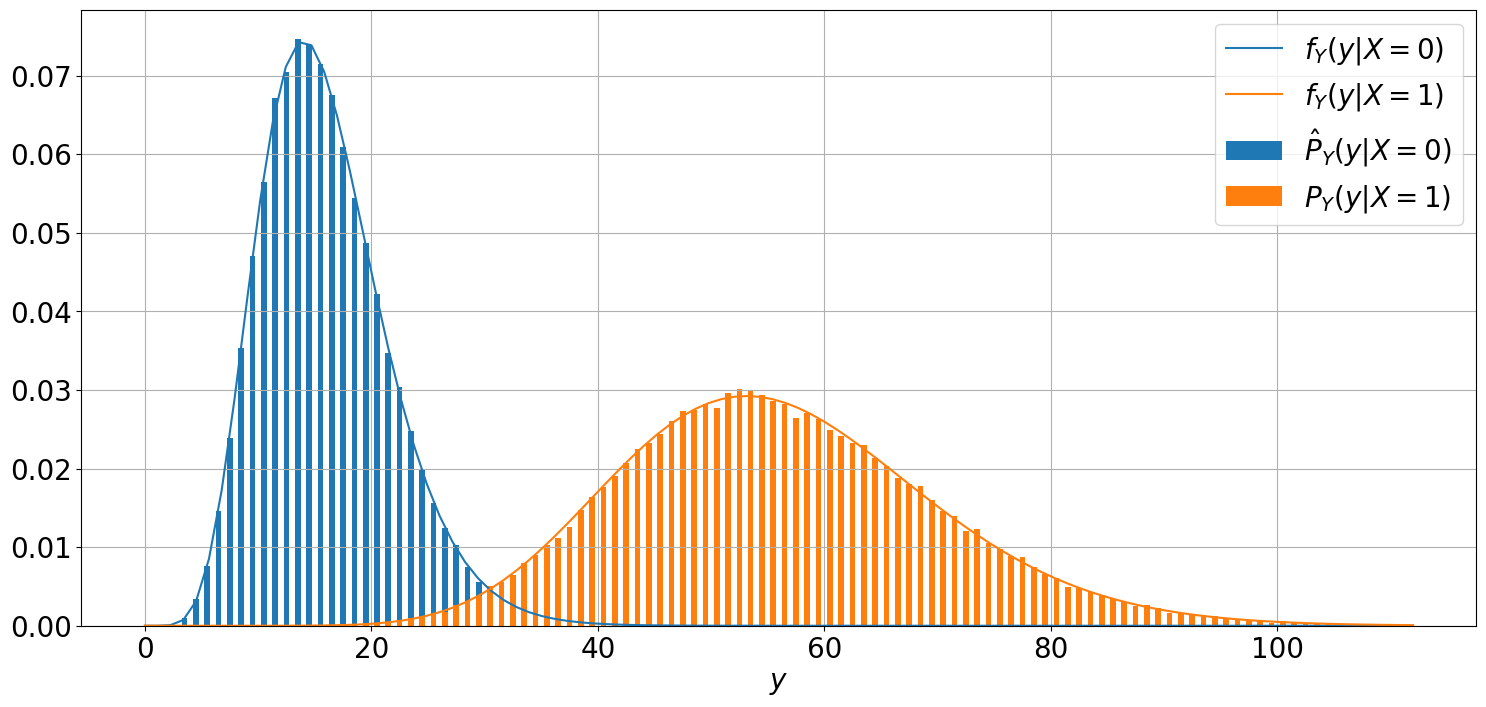

In [7]:
plt.figure()

fig, axs = plt.subplots(1, 1)

width = .5

ax = plt.subplot(111)
plt.bar( bin_edges_0[:-1] + width, hist_energies_0, width=width, label='$\hat{P}_Y(y|X=0)$' )
plt.bar( bin_edges_1[:-1] + width, hist_energies_1, width=width, label='$P_Y(y|X=1)$' )

# theoretical PDFs
y = np.linspace( 0, 2 * sigma_Z_2 * ( M + Lambda ), 100 )
f_theo_0 = 1 / ( np.sqrt( 2**M ) * sigma_Z_2 * special.gamma( M/2) ) * ( y / sigma_Z_2 ) ** (M/2-1) * np.exp( - y / ( 2 * sigma_Z_2 ) )
f_theo_1 = 1 / ( 2 * sigma_Z_2 ) * ( y / ( sigma_Z_2 * Lambda ) ) ** ( M/4 - 1/2 ) * np.exp( - ( y + Lambda * sigma_Z_2 ) / ( 2 * sigma_Z_2 ) ) * special.iv( M/2-1, np.sqrt( y * Lambda / sigma_Z_2 ) )

plt.plot(y, f_theo_0, label='$f_Y(y|X=0)$')
plt.plot(y, f_theo_1, label='$f_Y(y|X=1)$')

plt.xlabel('$y$'); 
plt.grid(1)
plt.legend()
plt.show()

In [8]:
# find ML rule by comparing PMFs and compare to theoretical results
threshold = np.min( np.where( hist_energies_0 < hist_energies_1 ) )

print('empirical ML threshold: \t', threshold )

empirical ML threshold: 	 30
